<a href="https://colab.research.google.com/github/DevHyunseo/DevHyunseo/blob/main/%EA%B3%BC%EC%A0%9C_%EC%98%88%EC%B8%A1%EB%AA%A8%EB%8D%B8(%EB%8B%A4%EC%A4%91%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%2C_%EA%B7%9C%EC%A0%9C%ED%99%94_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib

matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot

#  1. 다중선형 회귀분석 실습

## (1) 데이터 구성하기

In [ ]:
#파일 불러오고 데이터 확인
df_raw = pd.read_csv("/home/piai/바탕화면/빅데이터주간/01 실습파일/2. Big Data 분석/DIABETES.csv", encoding = 'euc-kr')
df_raw.head()

#     Y: 목표 변수 (당뇨 발병확률)
#     AGE: 나이
#     GENDER: 성별 (1-남성,2-여성)
#     BMI: 체질량지수
#     BP: 혈압
#     CHOLESTEROL: 총 콜레스테롤 수치
#     LDL: LDL수치
#     HDL: HDL수치
#     TCH: TCH수치
#     LTG: 라모트리진
#     GLUCOSE: 포도당

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [ ]:
# 결측치 확인
df_raw.isnull().sum()
# <분석결과>
# 결측치가 없음.

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

In [ ]:
#단위가 포함된 수치형 변수나 범주형 변수가 없으므로 넘어감.

## (2) 변수 간의 경향성 파악 : 그래프 분석

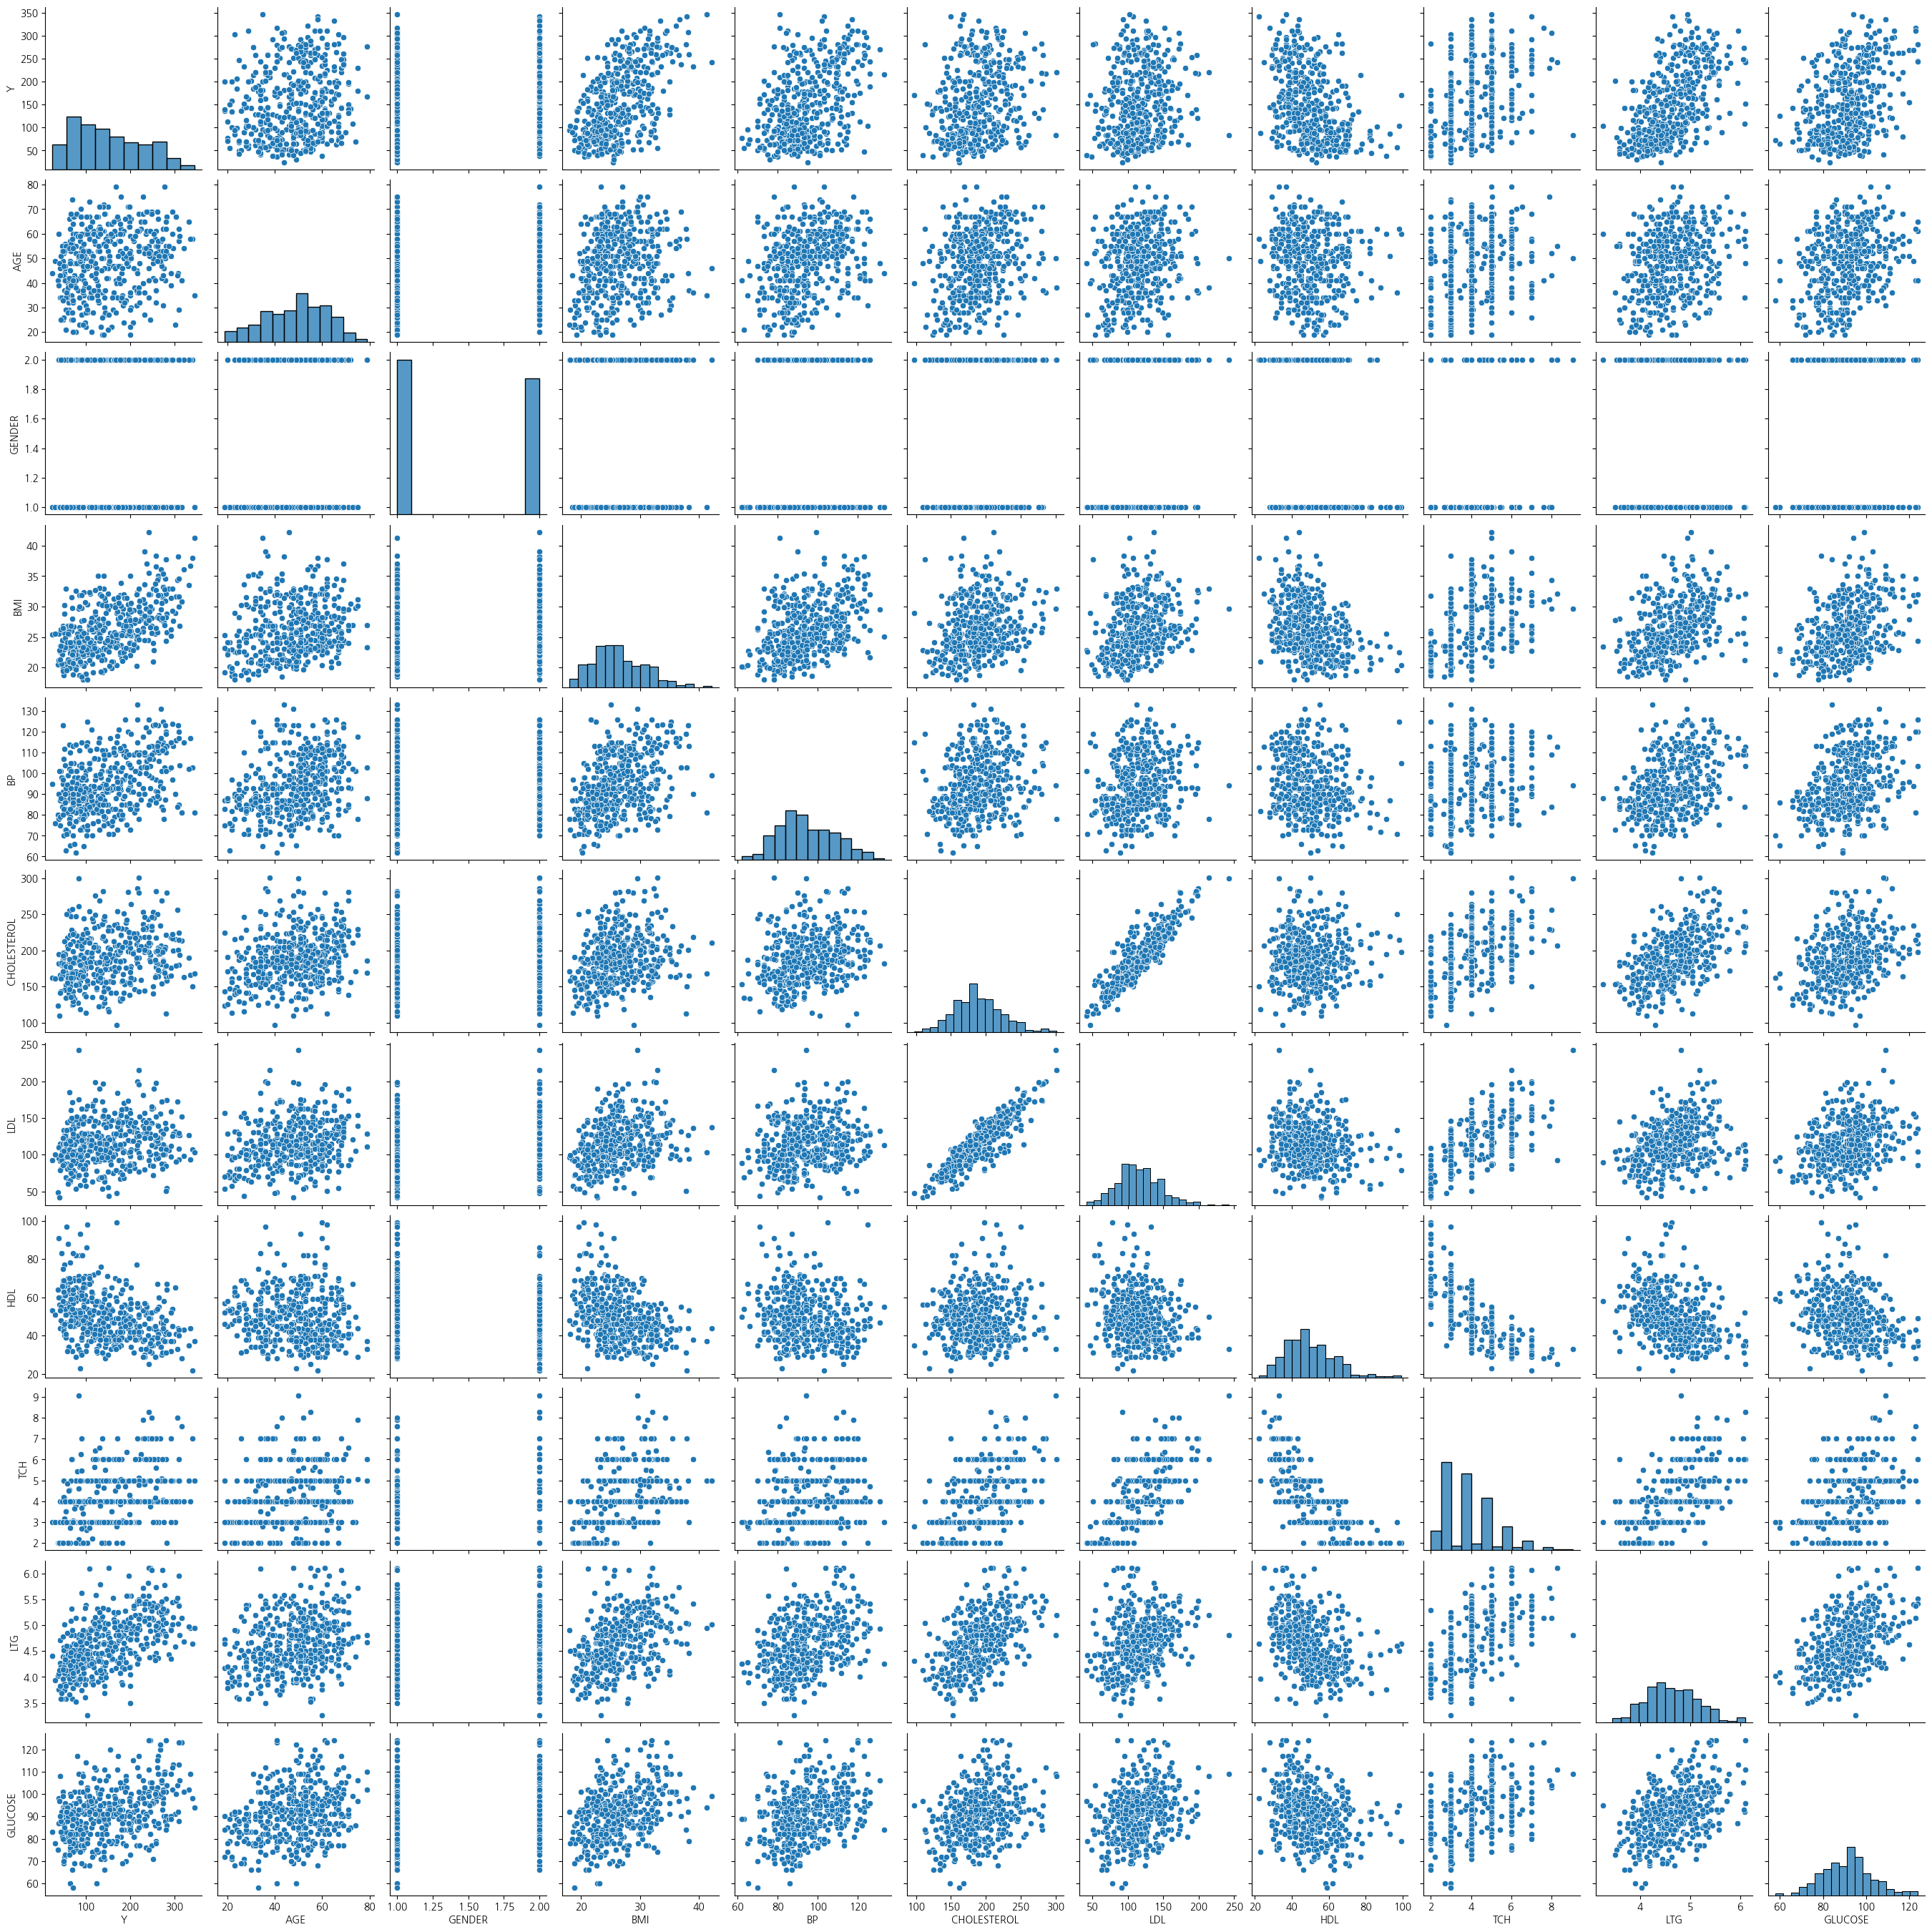

In [ ]:
#산점도를 가지고 목표변수(Y)에 대해 선형관계가 있는 설명변수를 확인함.
sns.pairplot(df_raw)
#<분석결과>
#그래프 상에서 BMI, BP, LTG, GLUCOSE의 선형관계가 확인됨.

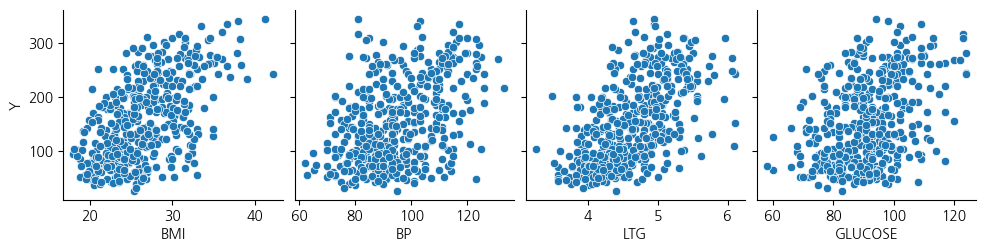

In [ ]:
#산점도 행렬 : 목표변수와 설명변수 지정
sns.pairplot(df_raw, y_vars='Y', x_vars=['BMI', 'BP', 'LTG', 'GLUCOSE'])
#<분석결과>
#목표 변수 Y와 다수 설명변수간의 선형관계 확인, 다중공선성 처리 필요

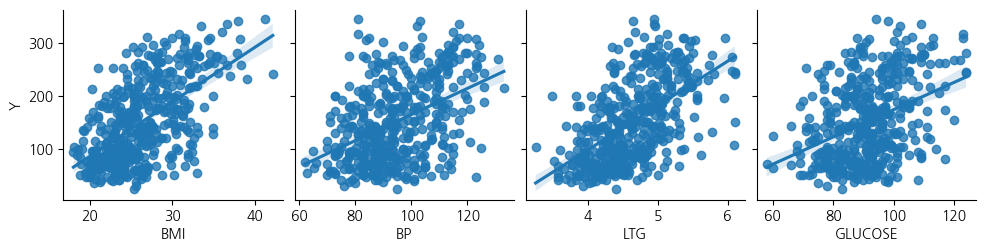

In [ ]:
#회귀 적합선 추가
sns.pairplot(df_raw, y_vars='Y', x_vars=['BMI', 'BP', 'LTG', 'GLUCOSE'], kind='reg')

In [ ]:
#변수 간의 경향성 파악 - 상관관계 분석
df_raw.corr().round(3)
#<분석결과>
#BMI, LTG는 강한 상관관계를 가지며, BP, TCH, GLUCOSE 역시 상관관계가 있다고 보인다.
#다수 서렴ㅇ변수 간의 선형관계가 확인되므로 다중공선성 확인 및 처리가 필요하다.

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.188,0.043,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382
AGE,0.188,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
GENDER,0.043,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208
BMI,0.586,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
BP,0.441,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
CHOLESTEROL,0.212,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
LDL,0.174,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
HDL,-0.395,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
TCH,0.430,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
LTG,0.566,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465


In [ ]:
#train/test data 분리
df_train, df_test = train_test_split(df_raw, test_size=0.3, random_state = 1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (309, 11)
test data size : (133, 11)


## (3) 모델의 적합성 확인 (회귀 모델)

In [ ]:
# 선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용
reg_model = smf.ols(formula = "Y ~ AGE + GENDER + BMI + BP + CHOLESTEROL + LDL + HDL + TCH + LTG + GLUCOSE", data = df_train)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

# <분석 결과>
# No. Observations(분석 자료 수) : 309
# Df Residuals (잔차 자유도) : 298
# Df Model(모델 자유도) : 10
# 분산분석결과 : 5.68e-43이므로 0.05보다 작으므로 모델이 통계적으로 유의미하다고 할 수 있다.
# 설명력 : Adj. R-squared가 0.511이므로 이 모델을 통해서 51.1%의 설명력을 가지고 있다.
# GENDER, BMI, BP, LTG는 p값이 유의수준 0.05보다 작으므로 유의해야 한다.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     33.24
Date:                Mon, 20 May 2024   Prob (F-statistic):           5.68e-43
Time:                        17:49:04   Log-Likelihood:                -1668.9
No. Observations:                 309   AIC:                             3360.
Df Residuals:                     298   BIC:                             3401.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -334.9870     86.627     -3.867      

In [ ]:
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop('Y', axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x)
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

#<분석결과>
# CHOLESTREROL 60.66으로 높으므로 다중공선성의 주요 원인으로 보고 제거하기로 함.

,variable,VIF
1,AGE,1.22
2,GENDER,1.23
4,BP,1.46
3,BMI,1.49
10,GLUCOSE,1.52
8,TCH,8.76
9,LTG,10.49
7,HDL,16.56
6,LDL,38.83
5,CHOLESTEROL,60.66


In [ ]:
# CHOLESTEROL 제거 후 확인
reg_model = smf.ols(formula = "Y ~ AGE + GENDER + BMI + BP + LDL + HDL + TCH + LTG + GLUCOSE", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

# <분석 결과>
# CHOLESTEROL을 제거한 후에도 큰 변화가 없음을 확인.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     36.64
Date:                Mon, 20 May 2024   Prob (F-statistic):           2.18e-43
Time:                        17:49:45   Log-Likelihood:                -1669.8
No. Observations:                 309   AIC:                             3360.
Df Residuals:                     299   BIC:                             3397.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -237.2111     46.686     -5.081      0.0

In [ ]:
# 다중공선성 처리 (CHOLESTREROL 제외)
df_train_x = df_train.drop(['Y', 'CHOLESTEROL'], axis = 1)
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF", ascending = True).round(2)

#<분석결과>
# VIF가 10이상인 변수가 더이상 없으므로 다중공선성 해결

,variable,VIF
1,AGE,1.22
2,GENDER,1.23
4,BP,1.45
3,BMI,1.49
9,GLUCOSE,1.52
8,LTG,2.16
5,LDL,2.70
6,HDL,3.57
7,TCH,7.55
0,const,225.32


In [ ]:
# 다중공선성 확인
# 선형 회귀 분석(유의하지 않은 변수 중 p-value가 가장 큰 것을 하나씩 반복적으로 제거)
reg_model = smf.ols(formula = "Y ~ AGE + GENDER + BMI + BP + LDL + HDL + TCH + LTG + GLUCOSE", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

# <분석 결과>
# age의 p_value가 0.731로 가장 크므로 제거하기로 함.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     36.64
Date:                Mon, 20 May 2024   Prob (F-statistic):           2.18e-43
Time:                        18:03:36   Log-Likelihood:                -1669.8
No. Observations:                 309   AIC:                             3360.
Df Residuals:                     299   BIC:                             3397.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -237.2111     46.686     -5.081      0.0

In [ ]:
# 다중공선성 처리 및 재확인 (AGE 제외)
df_train_x = df_train.drop(['Y', 'CHOLESTEROL', 'AGE'], axis = 1)
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
1,GENDER,1.22
3,BP,1.38
2,BMI,1.48
8,GLUCOSE,1.50
7,LTG,2.15
4,LDL,2.68
5,HDL,3.55
6,TCH,7.55
0,const,223.84


In [ ]:
# 다중공선성 확인 및 선형회귀분석 (AGE 제외)
reg_model = smf.ols(formula = "Y ~ GENDER + BMI + BP + LDL + HDL + TCH + LTG + GLUCOSE", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

# <분석 결과>
# TCH의 p_value가 0.684로 가장 크므로 제거하기로 함.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     41.32
Date:                Mon, 20 May 2024   Prob (F-statistic):           3.47e-44
Time:                        18:05:39   Log-Likelihood:                -1669.8
No. Observations:                 309   AIC:                             3358.
Df Residuals:                     300   BIC:                             3391.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -235.9082     46.464     -5.077      0.0

In [ ]:
# 다중공선성 처리 (TCH 제외)
df_train_x = df_train.drop(['Y', 'CHOLESTEROL', 'AGE', 'TCH'], axis = 1)
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
4,LDL,1.17
1,GENDER,1.21
3,BP,1.37
5,HDL,1.44
7,GLUCOSE,1.46
2,BMI,1.48
6,LTG,1.58
0,const,218.40


In [ ]:
# 다중공선성 재확인 및 선형회귀분석 (TCH 제외)
reg_model = smf.ols(formula = "Y ~ GENDER + BMI + BP + LDL + HDL + LTG + GLUCOSE", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

# <분석 결과>
# GLUCOSE의 p_value가 0.333으로 가장 크므로 제거하기로 함.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     47.34
Date:                Mon, 20 May 2024   Prob (F-statistic):           5.25e-45
Time:                        19:17:08   Log-Likelihood:                -1669.9
No. Observations:                 309   AIC:                             3356.
Df Residuals:                     301   BIC:                             3386.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -232.9624     45.832     -5.083      0.0

In [ ]:
# 다중공선성 처리 (GLUCOSE 제외)
df_train_x = df_train.drop(['Y', 'CHOLESTEROL', 'AGE', 'TCH', 'GLUCOSE'], axis = 1)
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
4,LDL,1.16
1,GENDER,1.20
3,BP,1.32
5,HDL,1.42
2,BMI,1.45
6,LTG,1.50
0,const,198.64


In [ ]:
# 다중공선성 재확인 및 선형회귀분석 (GLUCOSE 제외)
reg_model = smf.ols(formula = "Y ~ GENDER + BMI + BP + LDL + HDL + LTG", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

# <분석 결과>
# LDL의 p_value가 0.174로 가장 크므로 제거하기로 함.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     55.08
Date:                Mon, 20 May 2024   Prob (F-statistic):           1.07e-45
Time:                        19:18:40   Log-Likelihood:                -1670.4
No. Observations:                 309   AIC:                             3355.
Df Residuals:                     302   BIC:                             3381.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -219.6019     43.705     -5.025      0.0

In [ ]:
# 다중공선성 처리 (LDL 제외)
df_train_x = df_train.drop(['Y', 'CHOLESTEROL', 'AGE', 'TCH', 'GLUCOSE', 'LDL'], axis = 1)
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
1,GENDER,1.19
3,BP,1.31
4,HDL,1.42
2,BMI,1.43
5,LTG,1.45
0,const,198.22


In [ ]:
# 다중공선성 재확인 및 선형회귀분석 (LDL 제외)
reg_model = smf.ols(formula = "Y ~ GENDER + BMI + BP + HDL + LTG", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

# <분석 결과>
# 다중공선성 해결

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     65.54
Date:                Mon, 20 May 2024   Prob (F-statistic):           3.13e-46
Time:                        19:19:55   Log-Likelihood:                -1671.4
No. Observations:                 309   AIC:                             3355.
Df Residuals:                     303   BIC:                             3377.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -222.3503     43.720     -5.086      0.0

## (4) 잔차 가정 확인

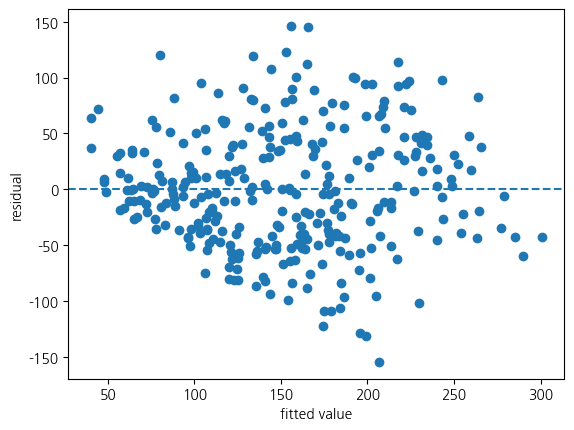

In [ ]:
# 잔차 산점도: X-예측값, Y-잔차
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

#<분석 결과>
#잔차가 y=0을 기준으로 random하게 산포되어 있으므로 등분산성을 만족한다.

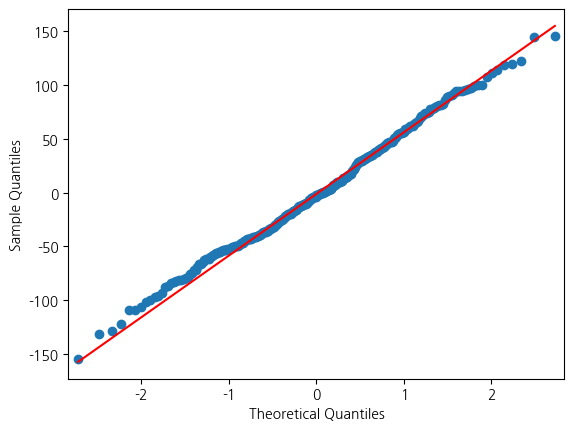

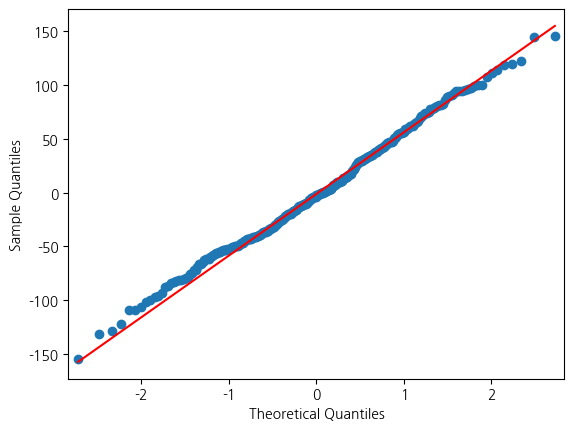

In [ ]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line,
#  r-regression line, q-quartiles
qqplot(reg_result.resid, line = "q")

#<분석 결과>
#정규분포 직선(적색 선)을 중심으로 분포하므로 정규분포를 따른다.

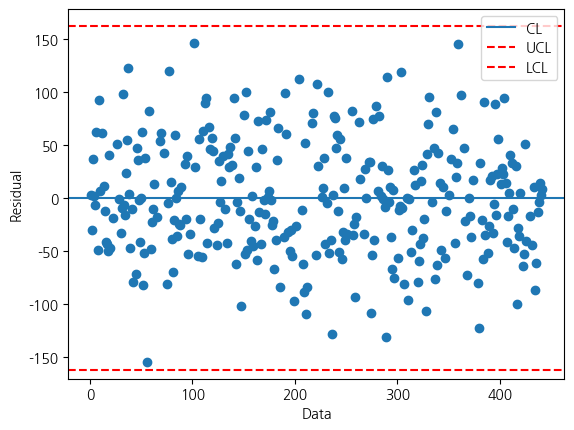

In [ ]:
# 잔차의 독립성 확인
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data")  ;  plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label='UCL' )
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label='LCL')
plt.legend()

#<분석 결과>
# 잔차가 y=0을 기준으로 관리상하한을 벗어나지 않고, random하게 산포되어 있으므로 독립성 만족한다.

## (5) 모델의 성능

In [ ]:
# 평가용 데이터에 대한 성능 확인
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train['Y'], train_pred))
print("test data의 결정계수:", r2_score(df_test['Y'], test_pred))

#<분석 결과>
#train data의 결정계수 : 52.3%
#test data의 결정계수 : 48.2%

train data의 결정계수: 0.5239941258284575
test data의 결정계수: 0.4820174090698405


In [ ]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test['Y'].head(10))
print('test data의 예측값 : \n', test_pred[:10])

#<분석 결과>
#test 데이터의 실제값과 예측값

test data의 실제값 : 
 353    109
29     283
173    101
131    158
387    201
92      48
40     100
261    103
64      71
74      85
Name: Y, dtype: int64
test data의 예측값 : 
 353    190.899129
29     184.095700
173     90.881975
131     73.850020
387    100.864464
92     188.201027
40     153.388316
261    120.757002
64     110.791383
74     150.376872
dtype: float64


## (6) 후진제거법으로 분석

In [ ]:
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 목표변수/설명변수 분리
df_train_y = df_train["Y"]
df_train_x = df_train.drop('Y', axis = 1)
# sklearn의 선형회귀 모델
model = LinearRegression()
# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_train_x, df_train_y)
# 선택된 변수 (5개 선택한 변수만 저장)
selected_cols = df_train_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['GENDER', 'BMI', 'BP', 'TCH', 'LTG'], dtype='object')
Removed Variables : Index(['AGE', 'CHOLESTEROL', 'LDL', 'HDL', 'GLUCOSE'], dtype='object')


In [ ]:
# Selected Variables : 'GENDER', 'BMI', 'BP', 'TCH', 'LTG' 선택하여 선형 회귀 분석.
rfe_reg_model = smf.ols(formula = "Y ~ GENDER + BMI + BP + TCH + LTG", data = df_train)
# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

#<분석결과>
# No. Observations: 309
# Df Residuals: 303
# Df Model: 5
# Prob (F-statistic): 5.75e-44이므로 0.05보다 작으므로 모델이 통계적으로 유의미하다고 할 수 있다.
# Adj. R-squared: 0.494 이므로 모델을 통하여 50%를 설명할 수 있음.
# TCH 변수는 P값이 0.067으로 0.05보다 크므로 유의하지 않음.
# 수작업으로 변수를 선택한 내용과 다르다는 것을 알 수 있다.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     61.23
Date:                Mon, 20 May 2024   Prob (F-statistic):           5.75e-44
Time:                        19:25:58   Log-Likelihood:                -1676.7
No. Observations:                 309   AIC:                             3365.
Df Residuals:                     303   BIC:                             3388.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -313.9754     34.219     -9.175      0.0

## (7) 결론 도출

<Axes: >

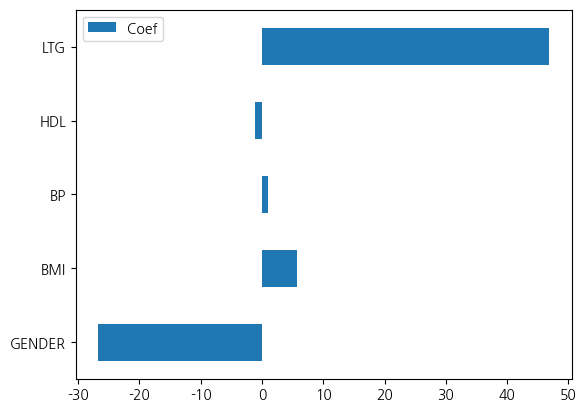

In [ ]:
# 최종 모델의 회귀식 : 수작업 모델링 결과 적용
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},
                           index = ['GENDER', 'BMI', 'BP', 'HDL','LTG'])
df_reg_coef.plot.barh(y = "Coef")

# <최종 분석 결과>
# (1) 최종 모델은 GENDER, BMI, BP, HDL, LTG 변수를 포함한다.
# (2) 결정계수(R-squared)는 0.523(훈련 데이터) 및 0.482(테스트 데이터)로 다중선형 회귀분석 모델의 설명력이 50% 정도임을 나타낸다.
# (3) LTG의 회귀 계수가 가장 큰 양의 값을 가지므로 LTG가 증가할수록 당뇨에 걸릴 위험이 크다.
# (4) GENDER의 회귀 계수는 큰 음의 값을 가지므로 남성의 경우 당뇨병 발생률이 낮다.

# 2. 다중선형 회귀분석_규제화 실습

## (1) 데이터 불러오기

In [ ]:
#패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet

#파일 불러오고 데이터 확인
df_raw = pd.read_csv("/home/piai/바탕화면/빅데이터주간/01 실습파일/2. Big Data 분석/DIABETES.csv", encoding = 'euc-kr')
df_raw.head()

#     Y: 목표 변수 (당뇨 발병확률)
#     AGE: 나이
#     GENDER: 성별 (1-남성,2-여성)
#     BMI: 체질량지수
#     BP: 혈압
#     CHOLESTEROL: 총 콜레스테롤 수치
#     LDL: LDL수치
#     HDL: HDL수치
#     TCH: TCH수치
#     LTG: 라모트리진
#     GLUCOSE: 포도당

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [ ]:
# 목표변수 분리
df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis = 1)

In [ ]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


## (2) 규제화 회귀모델 생성 : Ridge 모델

In [ ]:
#ridge 모델 생성
ridge = Ridge(random_state=1234, alpha=1)
ridge.fit(df_train_x, df_train_y)

#절편값 확인
print(ridge.intercept_)

-306.7161295761696


In [ ]:
# 회귀계수 확인
df_ridge_coef = pd.DataFrame({"Coef": ridge.coef_}, index = df_train_x.columns)
df_ridge_coef

,Coef
AGE,-0.087323
GENDER,-26.376339
BMI,5.732591
BP,1.096005
CHOLESTEROL,-0.710335
LDL,0.405217
HDL,-0.032363
TCH,5.870169
LTG,60.932680
GLUCOSE,0.324675


<Axes: >

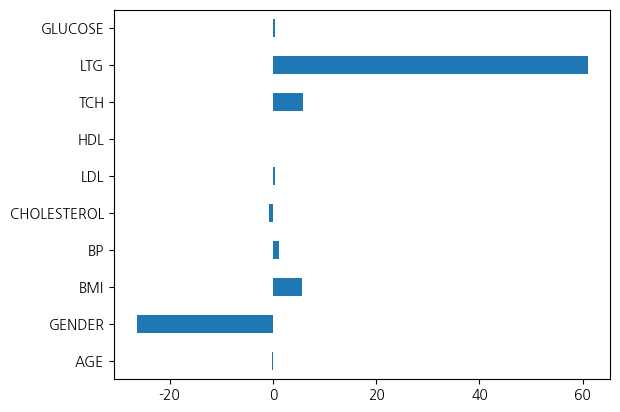

In [ ]:
# 회귀계수 그래프
df_ridge_coef.plot.barh(y = "Coef", legend = False)

In [ ]:
#ridge 모델 성능
train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

# # <분석 결과>
# 훈련 데이터의 결정계수 : 0.527
# 테스트 데이터의 결정계수 : 0.489

train data의 결정계수: 0.5270323945692674
test data의 결정계수: 0.48910997165704284


In [ ]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 353    109
29     283
173    101
131    158
387    201
92      48
40     100
261    103
64      71
74      85
Name: Y, dtype: int64
test data의 예측값 : 
 [171.89789432 182.13005996  93.05654646  71.67809122  95.63553324
 193.07824886 152.85093229 128.4696619  109.46068133 149.21214058]


## (2) 규제화 회귀모델 생성 : Lasso 모델

In [ ]:
# lasso 모델 생성
lasso = Lasso(random_state=1234, alpha = 1)
lasso.fit(df_train_x, df_train_y)
# 절편값 확인
print(lasso.intercept_)

-191.12806238247632


In [ ]:
# 회귀계수 확인
df_lasso_coef = pd.DataFrame({"Coef": lasso.coef_}, index = df_train_x.columns)
df_lasso_coef

,Coef
AGE,-0.080238
GENDER,-21.835843
BMI,5.897974
BP,1.059783
CHOLESTEROL,0.361522
LDL,-0.500923
HDL,-1.387184
TCH,0.000000
LTG,32.395348
GLUCOSE,0.349297


<Axes: >

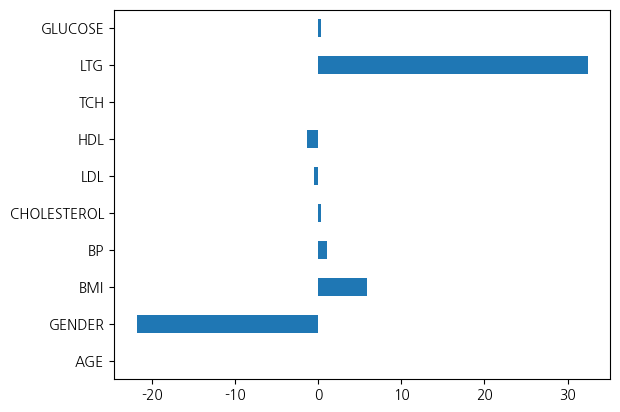

In [ ]:
# 회귀계수 그래프
df_lasso_coef.plot.barh(y = "Coef", legend = False)

In [ ]:
# lasso 모델의 성능
train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

# <분석 결과>
# 훈련 데이터의 결정계수 : 0.520,
# 테스트 데이터의 결정계수 : 0.484

train data의 결정계수: 0.5202442161926526
test data의 결정계수: 0.48454025777981535


In [ ]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 353    109
29     283
173    101
131    158
387    201
92      48
40     100
261    103
64      71
74      85
Name: Y, dtype: int64
test data의 예측값 : 
 [190.79481414 180.74336902  92.26567382  74.93068888 108.99918101
 185.29749749 155.74499296 118.38625098 110.76328445 152.92476021]


## (2) 규제화 회귀모델 생성 : ElasticNet 모델

In [ ]:
# elastic net 모델 생성
elastic = ElasticNet(random_state=1234, alpha = 1, l1_ratio = 0.5)
elastic.fit(df_train_x, df_train_y)
# 절편값 확인
print(elastic.intercept_)

-108.28267393864266


In [ ]:
# 회귀계수 확인
df_elastic_coef = pd.DataFrame({"Coef": elastic.coef_}, index = df_train_x.columns)
df_elastic_coef

,Coef
AGE,-0.131786
GENDER,-7.153634
BMI,6.173054
BP,1.020044
CHOLESTEROL,1.344753
LDL,-1.447656
HDL,-2.208906
TCH,0.089822
LTG,2.696663
GLUCOSE,0.311498


<Axes: >

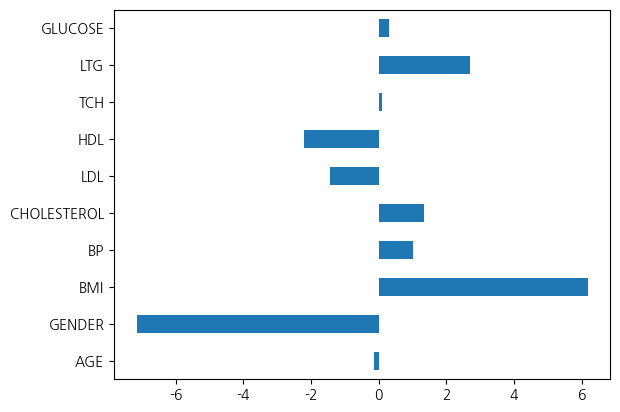

In [ ]:
# 회귀계수 그래프
df_elastic_coef.plot.barh(y = "Coef", legend = False)

In [ ]:
# elastic net 모델의 성능
train_pred =elastic.predict(df_train_x)
test_pred = elastic.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

# <분석 결과>
# 훈련 데이터의 결정계수 : 0.495,
# 테스트 데이터의 결정계수는 0.471

train data의 결정계수: 0.49535107410484036
test data의 결정계수: 0.47170749686444946


In [ ]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 353    109
29     283
173    101
131    158
387    201
92      48
40     100
261    103
64      71
74      85
Name: Y, dtype: int64
test data의 예측값 : 
 [204.71472232 182.59792674  96.75729772  73.67362263 120.25891404
 175.82827245 158.87857084 114.02980255 115.20026704 158.16051802]


In [ ]:
# (3) 최종 규제화 회귀 모델 생성

#Ridge 모델의 train data의 결정계수: 52.7%, test data의 결정계수: 48.9%
#Lasso 모델의 train data의 결정계수: 52.0%, test data의 결정계수: 48.4%
#Elastic Net 모델의 train data의 결정계수: 49.5%, test data의 결정계수: 47.1%
#3개의 모델을 비교했을 때 Ridge 모델이 가장 나은 성능을 보이고 있으므로 Ridge 모델을 채택.